Histogram of Orientated Gradients -

I started by reading all the car images and nonCar images provided in the repo. There were several files of car images so I read in all the images, creating a list of them using the glob API and glob function. I then created one list by using the extend methon on the list function. This was done for nonCar images as well.  I then pulled up a random image in both the car list and the nonCar list and viewed them. 

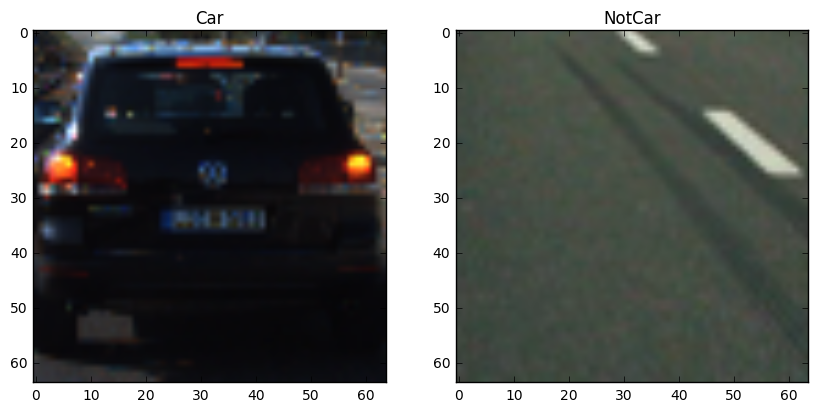

In [1]:
import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline 

# Get all Car images in one file.
file = os.getcwd()
car_images = glob.glob(file + '\\vehicles\KITTI_extracted\\*.png')

car_images2 = glob.glob(file + '\\vehicles\\GTI_Far\\image*.png')
car_images3 = glob.glob(file + '\\vehicles\\GTI_Left\\image*.png')
car_images4 = glob.glob(file + '\\vehicles\\GTI_MiddleClose\\image*.png')
car_images5 = glob.glob(file + '\\vehicles\\GTI_Right\\image*.png')

car_images.extend(car_images2)
car_images.extend(car_images3)
car_images.extend(car_images4)
car_images.extend(car_images5)


# Get all Not car images in one file.
notcar_images = glob.glob(file + '\\non-vehicles\\GTI\\image*.png')
notcar_images2 = glob.glob(file + '\\non-vehicles\\Extras\\extra*.png')

notcar_images.extend(notcar_images2)

# show Random image from car and Not car.

if len(car_images) < len(notcar_images):
    b = len(car_images)
else:
    b = len(notcar_images)
random_image_index = random.randint(0, b)

car_image = mpimg.imread(car_images[random_image_index])
notcar_image = mpimg.imread(notcar_images[random_image_index])

# Plotting random car and notcar images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Car')
ax1.imshow(car_image)

ax2.set_title('NotCar')
ax2.imshow(notcar_image)


In the cell below, I adapated code, provided in the lessons, to convert my randomly chosen car image and nonCar Images from RGB color format to YCrCb and obtained the HOG feature information and Visualisation. I chose to use the parameters below, since these are the parameters that yielded the best test results - with one exception. The Linear SVC algorithm that I will use worked better with a HOG feature vector that was combined from 'ALL' color channels in the YCrCb color space.

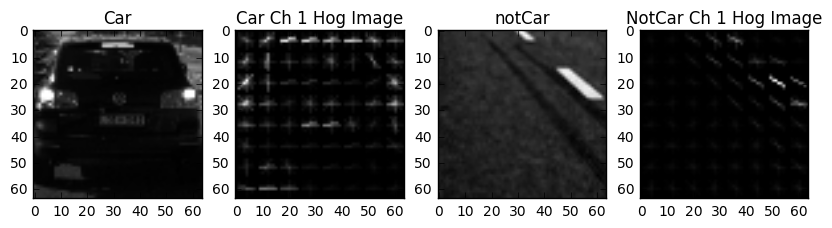

In [2]:
import cv2
from skimage.feature import hog


def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    
    # Get HOG features and Hog_visualization.
    
    features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                              cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                              visualise=vis, feature_vector=feature_vec)
    return features, hog_image
    

def extract_features(img, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    
    # Extracts features from an Image
            
    # Read in image: read in as 'RGB' color format.
    image = mpimg.imread(img)
    # apply color conversion if another color format chosen. 
    feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)     

    # Get HOG features by calling get_hog_features() function above.
    hog_features, hog_image = get_hog_features(feature_image[:,:,hog_channel], orient, 
                pix_per_cell, cell_per_block, vis=True, feature_vec=True)
    
    return hog_features, hog_image

colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12
pix_per_cell = 8
cell_per_block = 2
hog_channel = 0 



car_features, car_hog_image = extract_features(car_images[random_image_index], cspace=colorspace, orient=orient, 
                            pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel=hog_channel)
notcar_features, notcar_hog_image = extract_features(notcar_images[random_image_index], cspace=colorspace, orient=orient, 
                                    pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel=hog_channel)


# Plotting A car Image and a Not Car image
# Hot image for Car, Hog Image for notCar
# all channels plotting to get a view

car_image_rgb = cv2.cvtColor(car_image, cv2.COLOR_YCrCb2RGB)
car_image_gray = cv2.cvtColor(car_image_rgb, cv2.COLOR_RGB2GRAY)

notcar_image_rgb = cv2.cvtColor(notcar_image, cv2.COLOR_YCrCb2RGB)
notcar_image_gray = cv2.cvtColor(notcar_image_rgb, cv2.COLOR_RGB2GRAY)


f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))
ax1.set_title('Car')
ax1.imshow(car_image_gray, cmap='gray')

ax2.set_title('Car Ch 1 Hog Image')
ax2.imshow(car_hog_image, cmap='gray')

ax3.set_title('notCar')
ax3.imshow(notcar_image_gray, cmap='gray')

ax4.set_title('NotCar Ch 1 Hog Image')
ax4.imshow(notcar_hog_image, cmap='gray')


When I was testing to find the best parameters for the HOG function that generates the best HOG feature vector, I went step by step down the list of paramaters. I would keep all parameters at their default values and adjust each one of the paramaters to see which yeiled the greatest accuracy with my chosen LinearSVC() Machine Learning algorithm. I started by changing the color conversion parameter. I went through - RGB, HSV, LUV, HLS, YUV and YCrCb color spaces. YCrCb yeiled greatest accuracy. I then tested the best number of orientation bins, I went from 9 to 8 to 7 and then back up to 10, 11 and finally 12. Twelve worked the best. Next I changed the number of pixels_per_cell going from 8 to 6 to 4 and then 2 but at 2 I generated a memory error. It didn't matter anyway the accuracy scores of the ML algorithm went down as the number of pixels went down. The ML algorthim accuracy also went down when I went up from 8 to 10 and then 12 pixels. So I settled on 8. Next I tried the number of cells_per_block adjusting down to 1 and up to 3 both yeilded slightly worse results than 2. So I stuck with 2 cells_per_block. And finally I adjusted the number of HOG channels from 0 to 1 to 2 and finally 'ALL'. 'ALL' yieled the best results. 

I next created a new feature vector from each image by getting a histogram of the pixel color values by channel (get_histogram_color()) and binning them into 32 seperate bins. I tested this across the previous mentioned color spaces with the HLS color space yielding the best accuracy. Then I created a raw pixel values feature_vector (get_raw_pixels()). I tested reducing the image size down from 64x64 to 32x32 and this yielded slightly better accuracy. 

Next I combined the hist_features feature vector with the HOG feature vector and this yielded greater accuracy than the HOG feature vector alone. I next tried adding the raw_features vector the the combined HOG Feature/Hist Features vector. But this yielded slightly worse accuracy then just the combined HOG_Feature/Hist_Feature vector. So I decided not to use this feature vector. 

Now in order to do this testing, each time I created a feature vector and stacked all the feature vectors obtained from my list of car and notCar images into an array (first Car then notCary). I then scaled this array column wise, usind the SKlearn standard scaler. This scaler obtains the mean for each column - making that value zero - and then adjusting the rest of the values by scaling to unit variance. I then created label vectors - ones for the car images, zeros for the notCar images and stacked them as well. I then split this using the SKlearn train_test_split function to first train and then test how well our ML algorithm works. As mentioned already, I used the LinearSVC() classifier. All the code is in the next cell.

In [3]:
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def convert_color(image, cspace='RGB'):
    
    # assumes color is coming over as 'RGB' converts to specified Color space.
    
    if cspace != 'RGB':
        if cspace == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif cspace == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif cspace == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif cspace == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif cspace == 'YCrCb':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else:        
        feature_image = np.copy(image)

    return feature_image


def get_histogram_color(img, cspace='RGB'):
    
    # function will create histogram of each color channel and then concatenate for feature_vec
    image = convert_color(img, cspace)
    hist1 = np.histogram(image[:,:, 0], bins=32)
    hist2 = np.histogram(image[:,:, 1], bins=32)
    hist3 = np.histogram(image[:,:, 2], bins=32)
    hist_features = np.concatenate((hist1[0], hist2[0], hist3[0]))
    return hist_features

def get_raw_pixels(img, size=(32, 32)):
    
    # Get raw pixel values as feature vector. Adjust image size for greatest accuracy.
    
    img = cv2.resize(img, size)
    features = img.ravel()
    return features


def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    
    # Get HOG feature_vector and HOG image if vis==True, otherwise just HOG feature Vector
    
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features


def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    
    # Takes in a list of images and creates a list, features, of feature_vectors.
    
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        
        # apply color conversion by calling convert_color function.
        feature_image = convert_color(image, cspace=cspace)
        
        # if hog_channel==ALL call hog function on each channel
        # iterate through the channels to create one large feature_vec of hog_features.
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            
        # get histogram of color features feature_vector
        hist_features = get_histogram_color(image, cspace='HLS')
        
        # tested raw pixels feature_vector
        # raw_features = get_raw_pixels(image, size=(32, 32))
        # did not improve accuracy of our ML algorithm.
        
        # combine all feature vectors into one
        combine_features = np.hstack((hog_features, hist_features))
        
        features.append(combine_features)
        
    # Return list of feature vectors
    return features

# after experimentation the following initial values optimized LinearSVC() accuracy.
colorspace = 'YCrCb' 
orient = 12
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' 


# run our extract_features function on both car images and notCar images
# get a list of feature_vectors of each. Also, see how long it takes -- time().
t=time.time()
car_features = extract_features(car_images, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcar_images, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')


# Stack array of feature vectors, both car_features and notcar_features, vertically 
# to create one large array of feature vectors - X.
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Create labels vector - car_features will have Label One and notcar_features Zero.
# hstack will create one large vector (or column) of first ones for Car Features
# and then Zeros for notcar_features.
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))


# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
# fit the training data
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

65.72 Seconds to extract HOG features...
Using: 12 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 7152
18.34 Seconds to train SVC...
Test Accuracy of SVC =  0.9893
My SVC predicts:  [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  1.]
0.0 Seconds to predict 10 labels with SVC


Here I implemented a sliding windows function, find_cars, to search through an image and using the HOG feature extraction as described above in conjunction with the color_histogram feature extraction and then put these subsamples through our SVC classifier. If the classifier predicts that the subsample is a car, the function will append the rectangle coordinates of the image and then also draw a rectangle around the car portion of the original image. The parameters for this sliding windows function were all selected through experimentation of what worked best for our classifier in the previous ipython cell. A couple of additional parameters were selected, ystart, ystop, xstart and xstop - chosen by seeing in our images where cars will be and where it matters to us. Additionally I chose the scale size and the overlap value through experimentation - that is what worked best on all 6 test images.

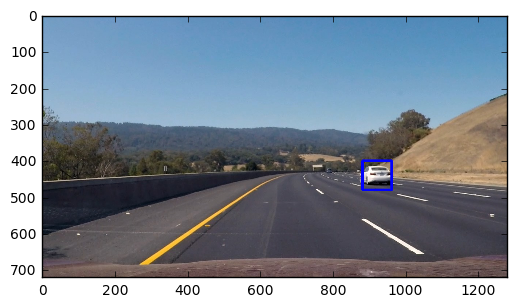

In [4]:

def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hist_bins):
    
    # function extracts features using hog sub-sampling and makes predictions on whether sampled image 
    # segment is a car, draw boxes around what it predicts are cars in image.
    
    draw_img = np.copy(img)
    # convert jpeg image - svc was trained on png images
    img = img.astype(np.float32)/255
    
    # specifies where in image to search for cars.
    img_tosearch = img[ystart:ystop,:,:]
    # convert image to 'YCrCb' color space - for best results with classifier
    ctrans_tosearch = convert_color(img_tosearch, cspace='YCrCb')
    
    # if we want to search for cars in image where the car is different size than our 64 pixel window. 
    # Scale image to appropriate size to take this into account.
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    # seperate image by color channels for HOG feature extraction.
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # get number of blocks: defined by size of image and pix_per_cell
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    # list where we will append rectangle coordinates of car images. 
    bbox = []
    
    # search through the whole image.
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch - for loops will iterate through entire image
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # convert subsampled image to RGB so we can convert to HLS color space.
            subimg = cv2.cvtColor(subimg, cv2.COLOR_YCrCb2RGB)
            # Remember our Histogram_Color feature_vec works on HLS color space, for our classifier.
            hist_features = get_histogram_color(subimg, cspace='HLS')

            # Combine feature_vectors, Scale features, and make a prediction
            test_features = X_scaler.transform(np.hstack(( hog_features, hist_features)).reshape(1, -1))      
            test_prediction = svc.predict(test_features)
            
            # if classifier predicts car, draw rectange where car will be in image, also return 
            # rectangle coordinates in list bbox.
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                bbox.append([(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)])
    return draw_img, bbox

# start lookin in image where a car could be.
ystart = 400
ystop = 656
scale = 1.25
hist_bins = 32


# for testing read in an image and see what it shows.
img = mpimg.imread(file + '\\test_images\\test3.jpg')
out_img, box_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hist_bins)

plt.imshow(out_img)

In the cell below we run and test the second part of our sliding windows portion of our image classification pipeline - once again from code originally provided in the class lectures. In this part we implement the heatmap portion. We'll use the functions below to take our image, get the list of rectangles for where our classifier identified a car from our find_cars function (from the cell above) and then run this through the functions below, begining with the add_heat function then the apply_threshold and finally the draw_labeled_bboxes function. We do this by first creating a copy of the image we will be searching for cars in, clearing out all pixel values to Zero and adding 1 to any pixel portion of our image that was contained by our returned rectangle list. Notice how we can add more than just one to the pixel, so if we return a couple of rectangles with overlapping pixels in them the pixels will be greater than one. This option comes into play in the apply_threshold function, here we can specify how much a pixel value has to be in order for it to be interpreted as being the interior of a rectange. 

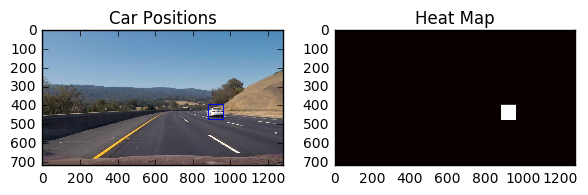

In [5]:
from scipy.ndimage.measurements import label


def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Read in image as above 
image = mpimg.imread(file + '\\test_images\\test3.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,0)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)

plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

This time I tested the code above - with some modifications - on a new image to see if it draws the heatmap correctly. It did except it found some cars in another lane. We'll correct that later by adjusting where - in this case - the xstart and xstop values when searching through our images.

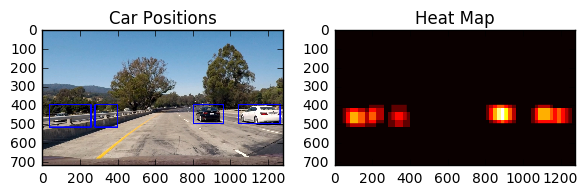

In [88]:

def draw(image, box_list):
    
    # create black image
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat, box_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, 0)
    
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    fig = plt.figure()
    plt.subplot(121)

    plt.imshow(draw_img)
    plt.title('Car Positions')
    plt.subplot(122)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    fig.tight_layout()
    return 

# start lookin in image where a car could be.
ystart = 400
ystop = 656
scale = 1.25
hist_bins = 32


# for testing read in an image and see what it shows.
img = mpimg.imread(file + '\\test_images\\test1.jpg')
out_img, box_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, hist_bins)

draw(img, box_list)


In this next Ipython cell I finalize my code. Here I've created a CarDetection class, to use on a video stream, so I can keep track of the previous images bounding boxes and heat_maps. Also, I've created class attributes so I can run through different scaling sizes (to Maximize vehicle detection at different image sizes). Additionally, I've set attributes for the ystart, ystop and xstart, xstop so we only look for cars images in the appropriate places for their given scale. Also, I created a scale attribute so we can have an array of scale values. Although a tried a couple of methods, the method I chose to weed out false positives was just to store the last six heat image maps. If a pixel had heat in 4 of the 6 images that heat a new image was created and that pixel was now a heated area. The final heat image was then labeled and seperate heated areas were given their own bounding boxes. Overlapping heated areas (if they represent two cars) were simply combined into one box, as they diverge enough and zero pixel values emerge between the two heated areas the label function will label them differently, essentially seperating the two boxes. 

In [72]:

class CarDetection():
    
    def __init__(self, ystart, ystop, xstart, xstop, scale_values, svc, X_scaler, orient, 
                 pix_per_cell, cell_per_block, hist_bins):
        
        # cars detected 
        self.box_list = []
        
        # y-coordinate values to start searching for cars - a list
        self.ystart = ystart
        
        # y-coordinate values to stop searching for cars - a list
        self.ystop = ystop
        
        # x-coordinate values to start searching for cars - a list
        self.xstart = xstart
        
        # x-coordinate values to stop searching for cars - a list
        self.xstop = xstop
        
        # list of scale values to search in image for
        self.scale_values = scale_values
        
        # classifier - function provided earlier 
        self.svc = svc
        
        # scaler - function provided earlier
        self.X_scaler = X_scaler
        
        # number of HOG orientation bins - provided earlier
        self.orient = orient
        
        # HOG - pix_per_cell - provided earlier
        self.pix_per_cell = pix_per_cell
        
        # HOG - cells_per_block - provided earlier
        self.cell_per_block = cell_per_block
        
        # number of Hist_bins - determined through experimentation - earlier
        self.hist_bins = hist_bins
        
        # keep track of the size of the previous bounding boxes
        self.bbox_prev_size = 0
        
        # Bounding box sixe
        self.bbox_size = 0
        
        # list of all heat_images
        self.heat_images = []
        
        
    def find_cars(self, img):
        
        # method extracts features on image using hog sub-sampling and makes predictions on whether sampled image 
        # updates box_list class attribute
        
        draw_img = np.copy(img)
        # convert jpeg image - svc was trained on png images
        img = img.astype(np.float32)/255
        
        # keep track of size of items previous bounding boxes.
        self.bbox_prev_size = self.bbox_size
        
        # list where we will append rectangle coordinates of car images. 
        bbox = []
        
        # update what xstart, xstop, ystart, ystop, scale - array values
        i = 0
        for scale in self.scale_values:
            
            # image to search will change, dependent on scale
            img_tosearch = img[self.ystart[i]:self.ystop[i], self.xstart[i]: self.xstop[i],:]
            ctrans_tosearch = convert_color(img_tosearch, cspace='YCrCb')
                
            if scale != 1:
                imshape = ctrans_tosearch.shape
                ctrans_tosearch = cv2.resize(ctrans_tosearch, 
                                             (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
            
            # seperate image by color channels for HOG feature extraction.
            ch1 = ctrans_tosearch[:,:,0]
            ch2 = ctrans_tosearch[:,:,1]
            ch3 = ctrans_tosearch[:,:,2]

            # get number of blocks: defined by size of image and pix_per_cell
            nxblocks = (ch1.shape[1] // self.pix_per_cell)-1
            nyblocks = (ch1.shape[0] // self.pix_per_cell)-1 
            nfeat_per_block = self.orient*self.cell_per_block**2
            # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
            window = 64
            nblocks_per_window = (window // self.pix_per_cell)-1 
            cells_per_step = 2  # Instead of overlap, define how many cells to step
            nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
            nysteps = (nyblocks - nblocks_per_window) // cells_per_step

            # Compute individual channel HOG features for the entire image
            hog1 = get_hog_features(ch1, self.orient, self.pix_per_cell, self.cell_per_block, feature_vec=False)
            hog2 = get_hog_features(ch2, self.orient, self.pix_per_cell, self.cell_per_block, feature_vec=False)
            hog3 = get_hog_features(ch3, self.orient, self.pix_per_cell, self.cell_per_block, feature_vec=False)
            
            # search through the whole image.
            for xb in range(nxsteps):
                for yb in range(nysteps):
                    ypos = yb*cells_per_step
                    xpos = xb*cells_per_step
                    # Extract HOG for this patch - for loops will iterate through entire image
                    hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                    xleft = xpos*pix_per_cell
                    ytop = ypos*pix_per_cell

                    # Extract the image patch
                    subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

                    # convert subsampled image to RGB so we can convert to HLS color space.
                    subimg = cv2.cvtColor(subimg, cv2.COLOR_YCrCb2RGB)
                    # Remember our Histogram_Color feature_vec works on HLS color space, for our classifier.
                    hist_features = get_histogram_color(subimg, cspace='HLS')

                    # Combine feature_vectors, Scale features, and make a prediction
                    test_features = self.X_scaler.transform(np.hstack(( hog_features, hist_features)).reshape(1, -1))       
                    test_prediction = self.svc.predict(test_features)

                    if test_prediction == 1:
                        xbox_left = np.int(xleft*scale)
                        ytop_draw = np.int(ytop*scale)
                        win_draw = np.int(window*scale)
                        # get found bounding box - adjust for size
                        bbox.append([(xbox_left+self.xstart[i], ytop_draw+self.ystart[i]),
                                     (xbox_left+self.xstart[i]+win_draw,ytop_draw+win_draw+ystart[i])])
            # update scale et al arrays, for next scale to search           
            i += 1
        self.bbox_size = len(bbox)
        self.box_list.extend(bbox)
        self.box_list = self.box_list[-self.bbox_size:]
        # initialize heat_image list for false positives.
        if not self.heat_images:
            self.heat_images.append(np.zeros_like(image[:,:,0]).astype(np.float))
        
        return 
    
    
    def add_heat(self, heatmap):
        # Iterate through list of bboxes       
        for box in self.box_list:
            # Add += 1 for all pixels inside each bbox
            # Assuming each "box" takes the form ((x1, y1), (x2, y2))
            heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
        # Return updated heatmap
        return heatmap# Iterate through list of bboxes
    
    def apply_threshold(self, heatmap, threshold):
        # Zero out pixels below the threshold
        heatmap[heatmap < threshold] = 0
        # Return thresholded map
        return heatmap

    def draw_labeled_bboxes(self, img, labels):
        # Iterate through all detected cars
        for car_number in range(1, labels[1]+1):
            # Find pixels with each car_number label value
            nonzero = (labels[0] == car_number).nonzero()
            # Identify x and y values of those pixels
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            # Define a bounding box based on min/max x and y
            bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
            # Draw the box on the image
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        # Return the image
        return img
    
    def draw(self, image):
    
        # create black image
        heat = np.zeros_like(image[:,:,0]).astype(np.float)

        # Add heat to each box in box list
        heat = self.add_heat(heat)

        # Apply threshold to help remove false positives
        heat = self.apply_threshold(heat, 1)
        heat[heat>0] = 1
        self.heat_images.append(heat)
        last_four = self.heat_images[-6:]
        map = np.sum(last_four, axis=0)
        map = self.apply_threshold(map, 4)
    
        # Find final boxes from heatmap using label function
        labels = label(map)
        draw_img = self.draw_labeled_bboxes(np.copy(image), labels)

        return draw_img



In [73]:
# create an instance of our CarDetection() class - cars - to process our raw images and find cars.
# serach through scale values.

scale_values = [1.0, 1.25, 1.5, 1.75, 2.0]

ystart=[400, 400, 400, 400, 400]
ystop=[550, 550, 550, 650, 650]

xstart = [600, 600, 550, 550, 500]
xstop = [1000, 1000, 1100, 1280, 1280]

cars = CarDetection(ystart, ystop, xstart, xstop, scale_values, svc, X_scaler, orient, pix_per_cell, cell_per_block, hist_bins)

def process_image(image):
    cars.find_cars(image)
    return cars.draw(image)
     
        

In [74]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# get raw video
clip = VideoFileClip(file + '\project_video.mp4')
# process raw images to find cars
outclip = clip.fl_image(process_image)
# write the output video to file
%time outclip.write_videofile('output_video.mp4', audio=False)

[MoviePy] >>>> Building video output_video.mp4
[MoviePy] Writing video output_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [09:23<00:00,  2.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video.mp4 

Wall time: 9min 24s


In [75]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('output_video.mp4'))

The biggest problem seems to be, making sure you scale the appropriate areas correctly. Cars in the distance will be small, Cars close by will be large. The classifier doesn't work well enough unless the areas are scaled appropriately. The pipeline would fail if there's suddenly a huge car or truck in front of you or a huge car or truck in the distance. Also, the background i think would effect the classifier. If we were driving in the city, we would get far more false positives. 